In [1]:
import geopandas as gpd
import pandas as pd
import aggregate as ag
import numpy as np

In [2]:
#load outcome data
crime_df = ag.produce_aggregate_data_by_year(2024)

#load 2022 crime data
crime22_df = ag.produce_aggregate_data_by_year(2022)

#rename columns in crime22_df by suffixing with '_2022'
crime22_df = crime22_df.add_suffix('_2022')
crime22_df.rename(columns={'LSOA code_2022': 'LSOA code'}, inplace=True)

2024-01-avon-and-somerset-street.csv
2024-01-avon-and-somerset
2024-01-bedfordshire-street.csv 1053
2024-01-bedfordshire
2024-01-btp-street.csv 1489
2024-01-btp
2024-01-cambridgeshire-street.csv 2565
2024-01-cambridgeshire
2024-01-cheshire-street.csv 3100
2024-01-cheshire
2024-01-city-of-london-street.csv 3731
2024-01-city-of-london
2024-01-cleveland-street.csv 3755
2024-01-cleveland
2024-01-cumbria-street.csv 4113
2024-01-cumbria
2024-01-derbyshire-street.csv 4441
2024-01-derbyshire
2024-01-devon-and-cornwall-street.csv 5178
2024-01-devon-and-cornwall
2024-01-dorset-street.csv 6246
2024-01-dorset
2024-01-durham-street.csv 6700
2024-01-durham
2024-01-dyfed-powys-street.csv 7131
2024-01-dyfed-powys
2024-01-essex-street.csv 7370
2024-01-essex
2024-01-gloucestershire-street.csv 8466
2024-01-gloucestershire
2024-01-gwent-street.csv 8860
2024-01-gwent
2024-01-hampshire-street.csv 9233
2024-01-hampshire
2024-01-hertfordshire-street.csv 10452
2024-01-hertfordshire
2024-01-humberside-street.cs

In [3]:


# Load LSOA shapefile
gdf = gpd.read_file(r"C:\Users\THW_9\Desktop\LSE School\WT\GY460\S2 Project\Datasets\lsoa\Lower_layer_Super_Output_Areas_December_2021_Boundaries_EW_BGC_V5_4492169359079898015\LSOA_2021_EW_BGC_V5.shp")  # or .geojson

# load LSOA MSOA mapping file
lsoa_msoa_df = pd.read_csv(r"C:\Users\THW_9\Desktop\LSE School\WT\GY460\S2 Project\Datasets\lsoa\OA21_LAD22_LSOA21_MSOA21_LEP22_EN_LU_V2_-6777887094253080892.csv")

# Load predictor data
predictor_df = pd.read_csv(r"C:\Users\THW_9\Desktop\LSE School\WT\GY460\S2 Project\Datasets\marriage\c21_marriage_lsoa.csv")
predictor11_df = pd.read_csv(r"C:\Users\THW_9\Desktop\LSE School\WT\GY460\S2 Project\Datasets\marriage\c11_marriage_lsoa.csv")

# Load control data 
control_df = pd.read_csv(r"C:\Users\THW_9\Desktop\LSE School\WT\GY460\S2 Project\Datasets\controls\c21_deprivation_lsoa.csv")
education_df = pd.read_csv(r"C:\Users\THW_9\Desktop\LSE School\WT\GY460\S2 Project\Datasets\controls\c21_highest_education_lsoa.csv")
density_df = pd.read_csv(r"C:\Users\THW_9\Desktop\LSE School\WT\GY460\S2 Project\Datasets\controls\c21_population_density.csv")

C:\Users\THW_9\AppData\Local\Temp\ipykernel_2096\900581309.py:5: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  lsoa_msoa_df = pd.read_csv(r"C:\Users\THW_9\Desktop\LSE School\WT\GY460\S2 Project\Datasets\lsoa\OA21_LAD22_LSOA21_MSOA21_LEP22_EN_LU_V2_-6777887094253080892.csv")


In [4]:
density_df['2021'].replace(',', '', regex=True, inplace=True)

#convert to numeric
density_df['2021'] = pd.to_numeric(density_df['2021'], errors='coerce')
#drop rows with NaN values
density_df = density_df.dropna()

In [5]:
#rename predictor_df lsoa column
predictor_df.rename(columns={'2021 super output area - lower layer': 'LSOA code'}, inplace=True)
predictor11_df.rename(columns={'2011 super output area - lower layer': 'LSOA code'}, inplace=True)
#remove one space from LSOA code
predictor_df['LSOA code'] = predictor_df['LSOA code'].str.replace(' ', '')
predictor11_df['LSOA code'] = predictor11_df['LSOA code'].str.split(' ').str[0]

#rename predictor11_df columns
predictor11_df.rename(columns={'Married': 'married_11',
                               'All categories: Marital and civil partnership status' : 'Total_11',
                               'In a registered same-sex civil partnership' : 'gayrate_11'}, inplace=True)

#remove one space from LSOA code in density_df
density_df['LSOA code'] = density_df['LSOA code'].str.replace(' ', '')

#rename control_df lsoa column
control_df.rename(columns={'2021 super output area - lower layer': 'LSOA code'}, inplace=True)
#clean up LSOA code by removing everything after the first space
control_df['LSOA code'] = control_df['LSOA code'].str.split(' ').str[0]

#rename education_df lsoa column
education_df.rename(columns={'2021 super output area - lower layer': 'LSOA code'}, inplace=True)
#clean up LSOA code by removing everything after the first space
education_df['LSOA code'] = education_df['LSOA code'].str.split(' ').str[0]

#rename msoa code column in lsoa_msoa_df
lsoa_msoa_df.rename(columns={'LSOA21CD': 'LSOA code',}, inplace=True)
#group lsoa_msoa_df by LSOA code, keeping LAD22NM
lsoa_msoa_df = lsoa_msoa_df.groupby('LSOA code', as_index=False).first()

# rename the column for LSOA in the shapefile to match the predictor data
gdf = gdf.rename(columns={"LSOA21CD": "LSOA code"})


In [6]:
# Merge with GeoDataFrame
gdf = gdf.merge(predictor_df, on='LSOA code')
gdf = gdf.merge(predictor11_df, on='LSOA code')
gdf = gdf.merge(control_df, on='LSOA code')
gdf = gdf.merge(education_df, on='LSOA code')
gdf = gdf.merge(density_df, on='LSOA code')
gdf = gdf.merge(lsoa_msoa_df, on='LSOA code')


In [7]:
#rename columns
gdf.rename(columns={'Married or in a registered civil partnership': 'married',
                    'Total: All usual residents aged 16 and over': 'Total',
                    'Total: All households': 'Total_Households',
                    'Household is not deprived in any dimension' : 'Not_Deprived',
                    'Level 4 qualifications or above': 'higher_education',
                    '2021' : 'density'
                    }, inplace=True)

gdf['gay'] = gdf['Married or in a registered civil partnership: Married: Same sex'] + gdf['Married or in a registered civil partnership: In a registered civil partnership: Same sex']
gdf['marriedrate'] = gdf['married'] / gdf['Total'] 
gdf['marriedrate_11'] = gdf['married_11'] / gdf['Total_11']
gdf['gayrate'] = gdf['gay'] / gdf['Total']
gdf['gayrate_11'] = gdf['gayrate_11'] / gdf['Total_11']
gdf['not_deprived_rate'] = gdf['Not_Deprived'] / gdf['Total_Households']
gdf['higher_education_rate'] = gdf['higher_education'] / gdf['Total']

# merge with crime data
gdf = gdf.merge(crime_df, on='LSOA code')
# merge with 2022 crime data
gdf = gdf.merge(crime22_df, on='LSOA code')


In [8]:
#make crime rates

gdf['serious_crime'] = gdf['Violence and sexual offences'] + gdf['Burglary'] + gdf['Robbery']  + gdf['Criminal damage and arson'] 
gdf['serious_crime_rate'] = gdf['serious_crime'] / gdf['Total'] * 100

#make crime rates for 2022
gdf['serious_crime_2022'] = gdf['Violence and sexual offences_2022'] + gdf['Burglary_2022'] + gdf['Robbery_2022']  + gdf['Criminal damage and arson_2022']
gdf['serious_crime_rate_2022'] = gdf['serious_crime_2022'] / gdf['Total_11'] * 100



In [9]:
from libpysal.weights import Queen

predictor = 'marriedrate'

# Create a dictionary to hold neighbor averages
neighbor_averages = {}

# Create a spatial weights matrix using Queen contiguity (shared borders)
w = Queen.from_dataframe(gdf)

for lsoa in gdf.index:
    neighbors = w.neighbors.get(lsoa, [])
    if neighbors:  # Skip if no neighbors
        neighbor_values = gdf.loc[neighbors, predictor]
        neighbor_averages[lsoa] = neighbor_values.mean()
    else:
        neighbor_averages[lsoa] = None  # Or use np.nan

# Convert dictionary to Series and assign to new column
gdf['neighbor_avg_' + predictor] = gdf.index.map(neighbor_averages.get)

predictor11 = 'marriedrate_11'

# Create a dictionary to hold neighbor averages
neighbor_averages = {}

# Create a spatial weights matrix using Queen contiguity (shared borders)
w = Queen.from_dataframe(gdf)

for lsoa in gdf.index:
    neighbors = w.neighbors.get(lsoa, [])
    if neighbors:  # Skip if no neighbors
        neighbor_values = gdf.loc[neighbors, predictor11]
        neighbor_averages[lsoa] = neighbor_values.mean()
    else:
        neighbor_averages[lsoa] = None  # Or use np.nan

# Convert dictionary to Series and assign to new column
gdf['neighbor_avg_' + predictor11] = gdf.index.map(neighbor_averages.get)


C:\Users\THW_9\AppData\Local\Temp\ipykernel_2096\1460338122.py:9: FutureWarning: `use_index` defaults to False but will default to True in future. Set True/False directly to control this behavior and silence this warning
  w = Queen.from_dataframe(gdf)
c:\Users\THW_9\anaconda3\envs\tf\lib\site-packages\libpysal\weights\contiguity.py:347: UserWarning: The weights matrix is not fully connected: 
 There are 89 disconnected components.
 There are 70 islands with ids: 4434, 4506, 4509, 4512, 4513, 4514, 4515, 4517, 4518, 4519, 4520, 4521, 4522, 4523, 4524, 4526, 4528, 4530, 4531, 4532, 4533, 4534, 4535, 4536, 4537, 4538, 4539, 4541, 4542, 4543, 4545, 4546, 4549, 4550, 4551, 4552, 4555, 4556, 4557, 4561, 4562, 4563, 4564, 4567, 4568, 4569, 4571, 4574, 4581, 4582, 4583, 4584, 4585, 4588, 4592, 4597, 4603, 4610, 4611, 4616, 4630, 4631, 15076, 16416, 16632, 18044, 18284, 25806, 30239, 30281.
  W.__init__(self, neighbors, ids=ids, **kw)
C:\Users\THW_9\AppData\Local\Temp\ipykernel_2096\1460338122

In [10]:
from sklearn.neighbors import NearestNeighbors

# 1. Get centroids and coordinates
gdf['centroid'] = gdf.geometry.centroid
coords = np.array(list(zip(gdf.centroid.x, gdf.centroid.y)))

# 2. Find 10 nearest neighbours (excluding self)
nbrs = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(coords)
distances, indices = nbrs.kneighbors(coords)

# distances: shape (n_samples, 11) → first column is distance to self (0)
# indices: same shape, gives row indices of nearest neighbours

# 3. Compute inverse-distance weighted average of a predictor variable
predictor_values = gdf[predictor].values

# We’ll skip the first column (self) and do weighted sum for 10 nearest neighbors
weighted_avgs = []
for i in range(len(gdf)):
    dists = distances[i, 1:]  # Skip self
    idxs = indices[i, 1:]     # Skip self
    weights = 1 / (dists + 1e-6)  # Inverse distance weights
    values = predictor_values[idxs]
    weighted_avg = np.sum(weights * values) / np.sum(weights)
    weighted_avgs.append(weighted_avg)

# 4. Store the result
gdf['decayed_10nn_avg_' + predictor] = weighted_avgs

# 1. Get centroids and coordinates
gdf['centroid'] = gdf.geometry.centroid
coords = np.array(list(zip(gdf.centroid.x, gdf.centroid.y)))

# 2. Find 10 nearest neighbours (excluding self)
nbrs = NearestNeighbors(n_neighbors=11, algorithm='ball_tree').fit(coords)
distances, indices = nbrs.kneighbors(coords)

# distances: shape (n_samples, 11) → first column is distance to self (0)
# indices: same shape, gives row indices of nearest neighbours

# 3. Compute inverse-distance weighted average of a predictor variable
predictor_values = gdf[predictor11].values

# We’ll skip the first column (self) and do weighted sum for 10 nearest neighbors
weighted_avgs = []
for i in range(len(gdf)):
    dists = distances[i, 1:]  # Skip self
    idxs = indices[i, 1:]     # Skip self
    weights = 1 / (dists + 1e-6)  # Inverse distance weights
    values = predictor_values[idxs]
    weighted_avg = np.sum(weights * values) / np.sum(weights)
    weighted_avgs.append(weighted_avg)

# 4. Store the result
gdf['decayed_10nn_avg_' + predictor11] = weighted_avgs

In [11]:
gdf

LSOA code                 LSOA21NM_x LSOA21NMW   BNG_E   BNG_N  \
0      E01000001        City of London 001A      None  532123  181632   
1      E01000002        City of London 001B      None  532480  181715   
2      E01000003        City of London 001C      None  532239  182033   
3      E01000005        City of London 001E      None  533581  181283   
4      E01000006  Barking and Dagenham 016A      None  544994  184274   
...          ...                        ...       ...     ...     ...   
30304  E01033762             Liverpool 060E      None  334541  390935   
30305  E01033763             Liverpool 031G      None  336923  390320   
30306  E01033765             Liverpool 061D      None  334915  388603   
30307  E01033767             Liverpool 050J      None  335565  387579   
30308  E01033768             Liverpool 037F      None  335928  389405   

           LAT      LONG                              GlobalID  \
0      51.5182 -0.097150  86214465-5cf4-4e8f-9492-3667471c42d6   
1      51.5188 -0.091970  cd40c491-6567-405f-8c18-426e17b356ce   
2      51.5217 -0.095330  7fd27aaf-d858-4e46-9099-92b43f66b948   
3      51.5147 -0.076280  7e76a16a-028f-4f49-84b5-6e5a67322f3c   
4      51.5387  0.089317  25ab047e-6fcf-4f76-9176-e92e44c0e097   
...        ...       ...                                   ...   
30304  53.4112 -2.986220  5d98d51e-27ff-400f-b82c-321bad6d2996   
30305  53.4059 -2.950270  069bfa89-1411-4c87-8aa1-f4328f054049   
30306  53.3903 -2.980120  6e68e2a9-9ce5-425b-a21a-0ea453695d8a   
30307  53.3811 -2.970130  b37b2a33-2ac4-4d29-84c0-030d7b508dd1   
30308  53.3976 -2.965050  f31bd151-70f1-4c9c-99cc-0688bda44c4b   

                                                geometry  \
0      POLYGON ((532105.312 182010.574, 532162.491 18...   
1      POLYGON ((532634.497 181926.016, 532619.141 18...   
2      POLYGON ((532135.138 182198.131, 532158.25 182...   
3      POLYGON ((533808.018 180767.774, 533649.037 18...   
4      POLYGON ((545122.049 184314.931, 545271.849 18...   
...                                                  ...   
30304  POLYGON ((334610.305 391111.312, 334622 391014...   
30305  POLYGON ((336648.738 390639.043, 336642.611 39...   
30306  POLYGON ((335087 388951, 335125 388808, 335162...   
30307  POLYGON ((335584.014 387799.682, 335678 387721...   
30308  POLYGON ((336113 389582.001, 336158 389386, 33...   

                             Area  ...  Violence and sexual offences_2022  \
0             City of London 001A  ...                               19.0   
1             City of London 001B  ...                               44.0   
2             City of London 001C  ...                               17.0   
3             City of London 001E  ...                              119.0   
4       Barking and Dagenham 016A  ...                               23.0   
...                           ...  ...                                ...   
30304              Liverpool 060E  ...                              185.0   
30305              Liverpool 031G  ...                              111.0   
30306              Liverpool 061D  ...                               45.0   
30307              Liverpool 050J  ...                               17.0   
30308              Liverpool 037F  ...                               71.0   

       serious_crime  serious_crime_rate  serious_crime_2022  \
0               47.0            3.473762                32.0   
1              123.0            9.468822                70.0   
2               56.0            3.733333                27.0   
3              257.0           26.826722               173.0   
4               44.0            3.076923                33.0   
...              ...                 ...                 ...   
30304          230.0            6.348330               241.0   
30305          105.0            4.955168               135.0   
30306           84.0            6.671962                59.0   
30307           32.0            3.860072           

# Regression Analysis (First)

In [12]:
#regress neighbourhood average predictor on crime
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [13]:
# Define the formula for the regression model
formula = 'serious_crime_rate ~ neighbor_avg_' + predictor + ' + ' + predictor + ' + not_deprived_rate + higher_education_rate + density + higher_education_rate * density'
# Fit the regression model
model = smf.ols(formula=formula, data=gdf).fit()
# Print the summary of the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     serious_crime_rate   R-squared:                       0.342
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                     2614.
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:36:47   Log-Likelihood:                -87563.
No. Observations:               30239   AIC:                         1.751e+05
Df Residuals:                   30232   BIC:                         1.752e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept     

In [14]:
# Define the formula for the regression model
formula = 'serious_crime_rate ~ neighbor_avg_' + predictor + ' + ' + predictor + ' + not_deprived_rate + higher_education_rate + density + C(LAD22NM)'
# Fit the regression model
model = smf.ols(formula=formula, data=gdf).fit()
# Print the summary of the regression results
#print(model.summary())

# Extract the summary as a DataFrame
summary_df = model.summary2().tables[1]

# List your main variables to show first
main_vars = [f'neighbor_avg_{predictor}', predictor, 'not_deprived_rate', 'higher_education_rate', 'density']

# Get remaining variables (including the fixed effects)
other_vars = [var for var in summary_df.index if var not in main_vars]

# Reorder the DataFrame
reordered_summary = summary_df.loc[main_vars + other_vars]

# Print the reordered summary
print(reordered_summary)



                               Coef.  Std.Err.          t          P>|t|  \
neighbor_avg_marriedrate  -11.175513  0.503112 -22.212792  1.947306e-108   
marriedrate               -18.681828  0.393319 -47.497915   0.000000e+00   
not_deprived_rate         -20.995146  0.501268 -41.884046   0.000000e+00   
higher_education_rate      11.565904  0.448612  25.781544  5.484025e-145   
density                    -0.000346  0.000009 -38.736205   0.000000e+00   
...                              ...       ...        ...            ...   
C(LAD22NM)[T.Worthing]      0.686157  0.839690   0.817154   4.138467e-01   
C(LAD22NM)[T.Wychavon]      1.649624  0.810112   2.036292   4.172984e-02   
C(LAD22NM)[T.Wyre]          1.469416  0.822173   1.787236   7.390953e-02   
C(LAD22NM)[T.Wyre Forest]   1.516029  0.836944   1.811387   7.009100e-02   
C(LAD22NM)[T.York]          0.557872  0.754856   0.739045   4.598856e-01   

                              [0.025     0.975]  
neighbor_avg_marriedrate  -12.161634 

In [15]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:     serious_crime_rate   R-squared:                       0.400
Model:                            OLS   Adj. R-squared:                  0.394
Method:                 Least Squares   F-statistic:                     64.23
Date:                Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                        12:36:49   Log-Likelihood:                -86151.
No. Observations:               30239   AIC:                         1.729e+05
Df Residuals:                   29927   BIC:                         1.755e+05
Df Model:                         311                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

In [16]:
#log transform the serious crime rate
gdf['log_serious_crime_rate'] = np.log(gdf['serious_crime_rate'] + 1)  # Adding 1 to avoid log(0)

# Define the formula for the regression model
formula = 'log_serious_crime_rate ~ neighbor_avg_' + predictor + ' + ' + predictor + ' + not_deprived_rate + higher_education_rate + density' #+ C(LAD22NM)'
# Fit the regression model
model = smf.ols(formula=formula, data=gdf).fit()
# Print the summary of the regression results
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     log_serious_crime_rate   R-squared:                       0.513
Model:                                OLS   Adj. R-squared:                  0.513
Method:                     Least Squares   F-statistic:                     6366.
Date:                    Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                            12:36:49   Log-Likelihood:                -15439.
No. Observations:                   30239   AIC:                         3.089e+04
Df Residuals:                       30233   BIC:                         3.094e+04
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [17]:
#log transform the serious crime rate
gdf['log_serious_crime_rate'] = np.log(gdf['serious_crime_rate'] + 1)  # Adding 1 to avoid log(0)

# Define the formula for the regression model
formula = 'log_serious_crime_rate ~ neighbor_avg_' + predictor + ' + ' + predictor + ' + not_deprived_rate + higher_education_rate + density + C(LAD22NM)'
# Fit the regression model
model = smf.ols(formula=formula, data=gdf).fit()
# Print the summary of the regression results
#print(model.summary())

# Extract the summary as a DataFrame
summary_df = model.summary2().tables[1]

# List your main variables to show first
main_vars = [f'neighbor_avg_{predictor}', predictor, 'not_deprived_rate', 'higher_education_rate', 'density']

# Get remaining variables (including the fixed effects)
other_vars = [var for var in summary_df.index if var not in main_vars]

# Reorder the DataFrame
reordered_summary = summary_df.loc[main_vars + other_vars]

# Print the reordered summary
print(reordered_summary)

                              Coef.      Std.Err.          t         P>|t|  \
neighbor_avg_marriedrate  -0.929103  4.415551e-02 -21.041598  1.391920e-97   
marriedrate               -2.462152  3.451957e-02 -71.326270  0.000000e+00   
not_deprived_rate         -2.487337  4.399374e-02 -56.538434  0.000000e+00   
higher_education_rate      0.789205  3.937234e-02  20.044666  8.608913e-89   
density                   -0.000034  7.835963e-07 -42.977057  0.000000e+00   
...                             ...           ...        ...           ...   
C(LAD22NM)[T.Worthing]     0.105468  7.369530e-02   1.431138  1.524012e-01   
C(LAD22NM)[T.Wychavon]     0.214818  7.109934e-02   3.021378  2.518397e-03   
C(LAD22NM)[T.Wyre]         0.189822  7.215786e-02   2.630652  8.526487e-03   
C(LAD22NM)[T.Wyre Forest]  0.205525  7.345426e-02   2.797999  5.145308e-03   
C(LAD22NM)[T.York]         0.072691  6.624982e-02   1.097224  2.725522e-01   

                             [0.025    0.975]  
neighbor_avg_ma

In [18]:
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     log_serious_crime_rate   R-squared:                       0.597
Model:                                OLS   Adj. R-squared:                  0.593
Method:                     Least Squares   F-statistic:                     142.5
Date:                    Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                            12:36:50   Log-Likelihood:                -12577.
No. Observations:                   30239   AIC:                         2.578e+04
Df Residuals:                       29927   BIC:                         2.837e+04
Df Model:                             311                                         
Covariance Type:                nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

In [19]:
#log transform the serious crime rate
gdf['log_serious_crime_rate'] = np.log(gdf['serious_crime_rate'] + 1)  # Adding 1 to avoid log(0)

# Define the formula for the regression model
formula = 'log_serious_crime_rate ~ decayed_10nn_avg_' + predictor + ' + ' + predictor + ' + not_deprived_rate + higher_education_rate + density' #+ C(LAD22NM)'
# Fit the regression model
model = smf.ols(formula=formula, data=gdf).fit()
# Print the summary of the regression results
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     log_serious_crime_rate   R-squared:                       0.494
Model:                                OLS   Adj. R-squared:                  0.494
Method:                     Least Squares   F-statistic:                     5919.
Date:                    Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                            12:36:50   Log-Likelihood:                -16256.
No. Observations:                   30309   AIC:                         3.252e+04
Df Residuals:                       30303   BIC:                         3.257e+04
Df Model:                               5                                         
Covariance Type:                nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------

In [20]:
#log transform the serious crime rate
gdf['log_serious_crime_rate'] = np.log(gdf['serious_crime_rate'] + 1)  # Adding 1 to avoid log(0)

# Define the formula for the regression model
formula = 'log_serious_crime_rate ~ decayed_10nn_avg_' + predictor + ' + ' + predictor + ' + not_deprived_rate + higher_education_rate + density + C(LAD22NM)'
# Fit the regression model
model = smf.ols(formula=formula, data=gdf).fit()
# Print the summary of the regression results
#print(model.summary())

# Extract the summary as a DataFrame
summary_df = model.summary2().tables[1]

# List your main variables to show first
main_vars = [f'decayed_10nn_avg_{predictor}', predictor, 'not_deprived_rate', 'higher_education_rate', 'density']

# Get remaining variables (including the fixed effects)
other_vars = [var for var in summary_df.index if var not in main_vars]

# Reorder the DataFrame
reordered_summary = summary_df.loc[main_vars + other_vars]

# Print the reordered summary
print(reordered_summary)

                                 Coef.      Std.Err.          t         P>|t|  \
decayed_10nn_avg_marriedrate -0.750215  4.711509e-02 -15.923021  7.505063e-57   
marriedrate                  -2.571875  3.388700e-02 -75.895642  0.000000e+00   
not_deprived_rate            -2.491220  4.407935e-02 -56.516724  0.000000e+00   
higher_education_rate         0.792934  3.946504e-02  20.092074  3.348994e-89   
density                      -0.000032  7.796277e-07 -41.521458  0.000000e+00   
...                                ...           ...        ...           ...   
C(LAD22NM)[T.Worthing]        0.105640  7.394350e-02   1.428661  1.531120e-01   
C(LAD22NM)[T.Wychavon]        0.201387  7.133274e-02   2.823209  4.757692e-03   
C(LAD22NM)[T.Wyre]            0.190456  7.240100e-02   2.630567  8.528608e-03   
C(LAD22NM)[T.Wyre Forest]     0.198342  7.369993e-02   2.691204  7.123419e-03   
C(LAD22NM)[T.York]            0.068805  6.647670e-02   1.035024  3.006662e-01   

                           

In [21]:
print(model.summary())

                              OLS Regression Results                              
Dep. Variable:     log_serious_crime_rate   R-squared:                       0.600
Model:                                OLS   Adj. R-squared:                  0.596
Method:                     Least Squares   F-statistic:                     143.6
Date:                    Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                            12:36:51   Log-Likelihood:                -12707.
No. Observations:                   30309   AIC:                         2.604e+04
Df Residuals:                       29995   BIC:                         2.865e+04
Df Model:                             313                                         
Covariance Type:                nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------

# Regression Analysis (Second)

In [ ]:
#produce difference between 2021 and 2011 averages
gdf['delta_neighbor_avg_' + predictor] = gdf['neighbor_avg_' + predictor] - gdf['neighbor_avg_' + predictor11] / 10
gdf['delta_decayed_10nn_avg_' + predictor] = gdf['decayed_10nn_avg_' + predictor] - gdf['decayed_10nn_avg_' + predictor11] / 10

#produce difference between 2021 and 2011 married rates
gdf['delta_marriedrate'] = gdf['marriedrate'] - gdf['marriedrate_11']  / 10

#produce difference between 2024 and 2022 serious crime rates
gdf['delta_serious_crime_rate'] = gdf['serious_crime_rate'] - gdf['serious_crime_rate_2022'] /2
gdf['positive_crime_growth'] = gdf['delta_serious_crime_rate'] > 0  
#transform positive_crime_growth to int
gdf['positive_crime_growth'] = gdf['positive_crime_growth'].astype(int)

gdf['positive_marriage_growth'] = gdf['delta_marriedrate'] > 0
#transform positive_marriage_growth to int
gdf['positive_marriage_growth'] = gdf['positive_marriage_growth'].astype(int)

#log transform the delta serious crime rate
gdf['log_delta_serious_crime_rate'] = np.log(gdf['delta_serious_crime_rate'] + 0.01) 

c:\Users\THW_9\anaconda3\envs\tf\lib\site-packages\pandas\core\arraylike.py:396: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
# Define the formula for the regression model
formula = 'delta_serious_crime_rate ~  delta_marriedrate' #+ not_deprived_rate + higher_education_rate + density'
# Fit the regression model
model = smf.ols(formula=formula, data=gdf).fit()
# Print the summary of the regression results
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     delta_serious_crime_rate   R-squared:                       0.045
Model:                                  OLS   Adj. R-squared:                  0.044
Method:                       Least Squares   F-statistic:                     1412.
Date:                      Mon, 02 Jun 2025   Prob (F-statistic):          4.84e-302
Time:                              12:36:51   Log-Likelihood:                -71127.
No. Observations:                     30309   AIC:                         1.423e+05
Df Residuals:                         30307   BIC:                         1.423e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [24]:
# Define the formula for the regression model
formula = 'delta_serious_crime_rate ~ delta_neighbor_avg_marriedrate + delta_marriedrate + not_deprived_rate + higher_education_rate + density'
# Fit the regression model
model = smf.ols(formula=formula, data=gdf).fit()
# Print the summary of the regression results
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     delta_serious_crime_rate   R-squared:                       0.071
Model:                                  OLS   Adj. R-squared:                  0.071
Method:                       Least Squares   F-statistic:                     459.9
Date:                      Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                              12:36:51   Log-Likelihood:                -70570.
No. Observations:                     30239   AIC:                         1.412e+05
Df Residuals:                         30233   BIC:                         1.412e+05
Df Model:                                 5                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [25]:
# Define the formula for the regression model
formula = 'positive_crime_growth ~ delta_marriedrate + not_deprived_rate + higher_education_rate + density'
# Fit the regression model
model = smf.logit(formula=formula, data=gdf).fit()
# Print the summary of the regression results
print(model.summary())

Optimization terminated successfully.
         Current function value: 0.607853
         Iterations 5
                             Logit Regression Results                            
Dep. Variable:     positive_crime_growth   No. Observations:                30309
Model:                             Logit   Df Residuals:                    30304
Method:                              MLE   Df Model:                            4
Date:                   Mon, 02 Jun 2025   Pseudo R-squ.:                 0.01181
Time:                           12:36:51   Log-Likelihood:                -18423.
converged:                          True   LL-Null:                       -18644.
Covariance Type:               nonrobust   LLR p-value:                 5.419e-94
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 2.2887      0.085     26.818      0.

In [26]:
# Define the formula for the regression model
formula = 'delta_serious_crime_rate ~ delta_neighbor_avg_' + predictor + ' + delta_marriedrate' #+ not_deprived_rate + higher_education_rate + density'
# Fit the regression model
model = smf.ols(formula=formula, data=gdf).fit()
# Print the summary of the regression results
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     delta_serious_crime_rate   R-squared:                       0.045
Model:                                  OLS   Adj. R-squared:                  0.045
Method:                       Least Squares   F-statistic:                     711.8
Date:                      Mon, 02 Jun 2025   Prob (F-statistic):          8.69e-303
Time:                              12:36:51   Log-Likelihood:                -70983.
No. Observations:                     30239   AIC:                         1.420e+05
Df Residuals:                         30236   BIC:                         1.420e+05
Df Model:                                 2                                         
Covariance Type:                  nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [27]:
# Define the formula for the regression model
formula = 'delta_serious_crime_rate ~ delta_neighbor_avg_' + predictor + ' + delta_marriedrate + not_deprived_rate + higher_education_rate + density + C(LAD22NM)'
# Fit the regression model
model = smf.ols(formula=formula, data=gdf).fit()
# Print the summary of the regression results
#print(model.summary())

# Extract the summary as a DataFrame
summary_df = model.summary2().tables[1]

# List your main variables to show first
main_vars = [f'delta_neighbor_avg_{predictor}', 'delta_marriedrate' , 'not_deprived_rate', 'higher_education_rate', 'density']

# Get remaining variables (including the fixed effects)
other_vars = [var for var in summary_df.index if var not in main_vars]

# Reorder the DataFrame
reordered_summary = summary_df.loc[main_vars + other_vars]

# Print the reordered summary
print(reordered_summary)

                                   Coef.  Std.Err.          t          P>|t|  \
delta_neighbor_avg_marriedrate -1.956904  0.323941  -6.040919   1.550448e-09   
delta_marriedrate              -3.917353  0.251697 -15.563756   2.098174e-54   
not_deprived_rate              -7.351597  0.285603 -25.740656  1.539200e-144   
higher_education_rate           4.930699  0.257388  19.156700   2.613420e-81   
density                        -0.000114  0.000005 -22.274677  5.013513e-109   
...                                  ...       ...        ...            ...   
C(LAD22NM)[T.Worthing]          0.416979  0.482699   0.863849   3.876777e-01   
C(LAD22NM)[T.Wychavon]         -0.624514  0.465687  -1.341058   1.799117e-01   
C(LAD22NM)[T.Wyre]              0.686706  0.472627   1.452954   1.462469e-01   
C(LAD22NM)[T.Wyre Forest]       0.244709  0.481119   0.508624   6.110192e-01   
C(LAD22NM)[T.York]              0.160696  0.433949   0.370311   7.111535e-01   

                                  [0.02

In [28]:
print(model.summary())

                               OLS Regression Results                               
Dep. Variable:     delta_serious_crime_rate   R-squared:                       0.139
Model:                                  OLS   Adj. R-squared:                  0.130
Method:                       Least Squares   F-statistic:                     15.58
Date:                      Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                              12:36:53   Log-Likelihood:                -69410.
No. Observations:                     30239   AIC:                         1.394e+05
Df Residuals:                         29927   BIC:                         1.420e+05
Df Model:                               311                                         
Covariance Type:                  nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------

In [29]:
# Define the formula for the regression model
formula = 'log_delta_serious_crime_rate ~ delta_decayed_10nn_avg_' + predictor + ' + delta_marriedrate + not_deprived_rate + higher_education_rate + density'
# Fit the regression model
model = smf.ols(formula=formula, data=gdf).fit()
# Print the summary of the regression results
print(model.summary())

                                 OLS Regression Results                                 
Dep. Variable:     log_delta_serious_crime_rate   R-squared:                       0.152
Model:                                      OLS   Adj. R-squared:                  0.152
Method:                           Least Squares   F-statistic:                     757.3
Date:                          Mon, 02 Jun 2025   Prob (F-statistic):               0.00
Time:                                  12:36:53   Log-Likelihood:                -32115.
No. Observations:                         21155   AIC:                         6.424e+04
Df Residuals:                             21149   BIC:                         6.429e+04
Df Model:                                     5                                         
Covariance Type:                      nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
-------

# Descriptive Stats

In [ ]:
#mean std deviation min and max from a column

def get_stats(column):
    mean = column.mean()
    std = column.std()
    min_val = column.min()
    max_val = column.max()
    
    return pd.Series({'mean': mean, 'std': std, 'min': min_val, 'max': max_val})

# Apply the function to the 'delta_serious_crime_rate' column

stats = get_stats(gdf['delta_serious_crime_rate'])
print(stats)

mean     0.948232
std      2.587213
min    -72.449371
max     85.086376
dtype: float64


In [51]:
stats = get_stats(gdf['delta_neighbor_avg_' + predictor])
print(stats)

mean    0.410816
std     0.076893
min     0.045422
max     0.603247
dtype: float64


In [52]:
stats = get_stats(gdf['delta_' + predictor])
print(stats)

mean    0.407713
std     0.097585
min     0.012103
max     0.672042
dtype: float64


In [30]:
gdf[['neighbor_avg_' + predictor, predictor, 'gayrate', 'not_deprived_rate', 'higher_education_rate', 'density']].corr()


neighbor_avg_marriedrate  marriedrate   gayrate  \
neighbor_avg_marriedrate                  1.000000     0.765181 -0.246461   
marriedrate                               0.765181     1.000000 -0.183348   
gayrate                                  -0.246461    -0.183348  1.000000   
not_deprived_rate                         0.380798     0.544523  0.107646   
higher_education_rate                     0.015362     0.170057  0.325191   
density                                  -0.557635    -0.499522  0.212571   

                          not_deprived_rate  higher_education_rate   density  
neighbor_avg_marriedrate           0.380798               0.015362 -0.557635  
marriedrate                        0.544523               0.170057 -0.499522  
gayrate                            0.107646               0.325191  0.212571  
not_deprived_rate                  1.000000               0.691164 -0.276983  
higher_education_rate              0.691164               1.000000  0.186639  
density                           -0.276983               0.186639  1.000000

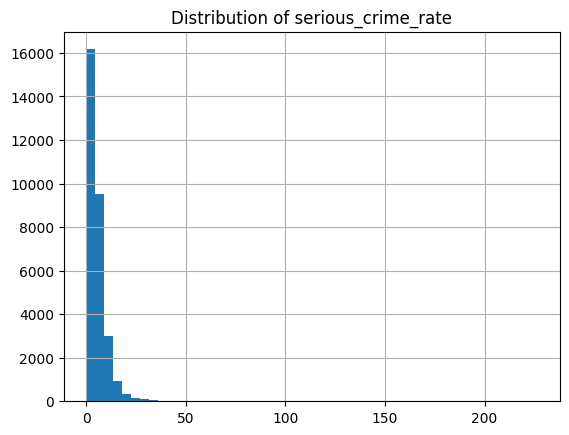

In [31]:
import matplotlib.pyplot as plt
gdf['serious_crime_rate'].hist(bins=50)
plt.title('Distribution of serious_crime_rate')
plt.show()


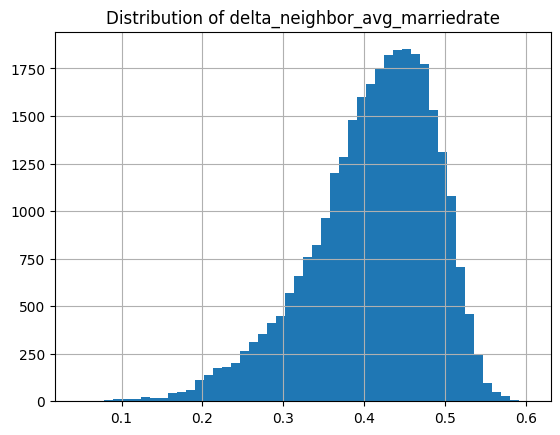

In [41]:

gdf['delta_neighbor_avg_' + predictor].hist(bins=50)
plt.title('Distribution of delta_neighbor_avg_' + predictor)
plt.show()


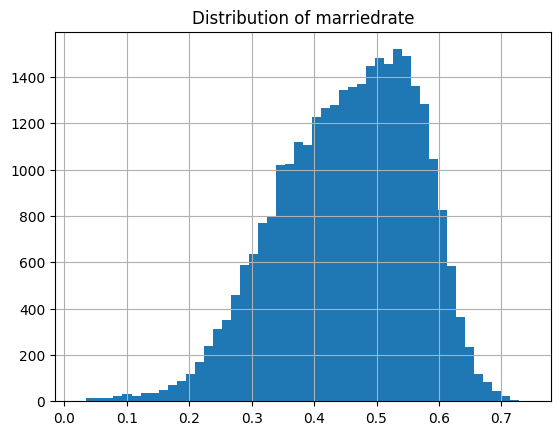

In [32]:

gdf['marriedrate'].hist(bins=50)
plt.title('Distribution of marriedrate')
plt.show()


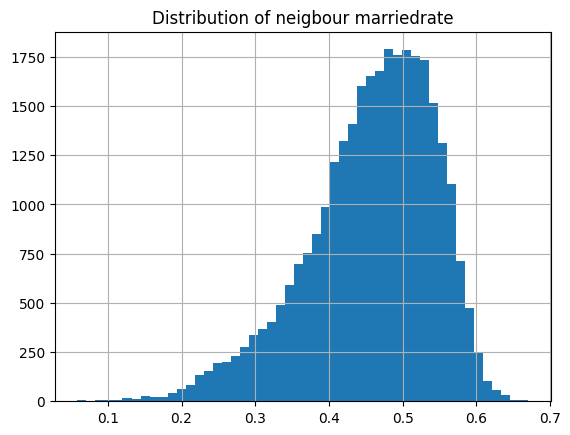

In [33]:
gdf['neighbor_avg_marriedrate'].hist(bins=50)
plt.title('Distribution of neigbour marriedrate')
plt.show()


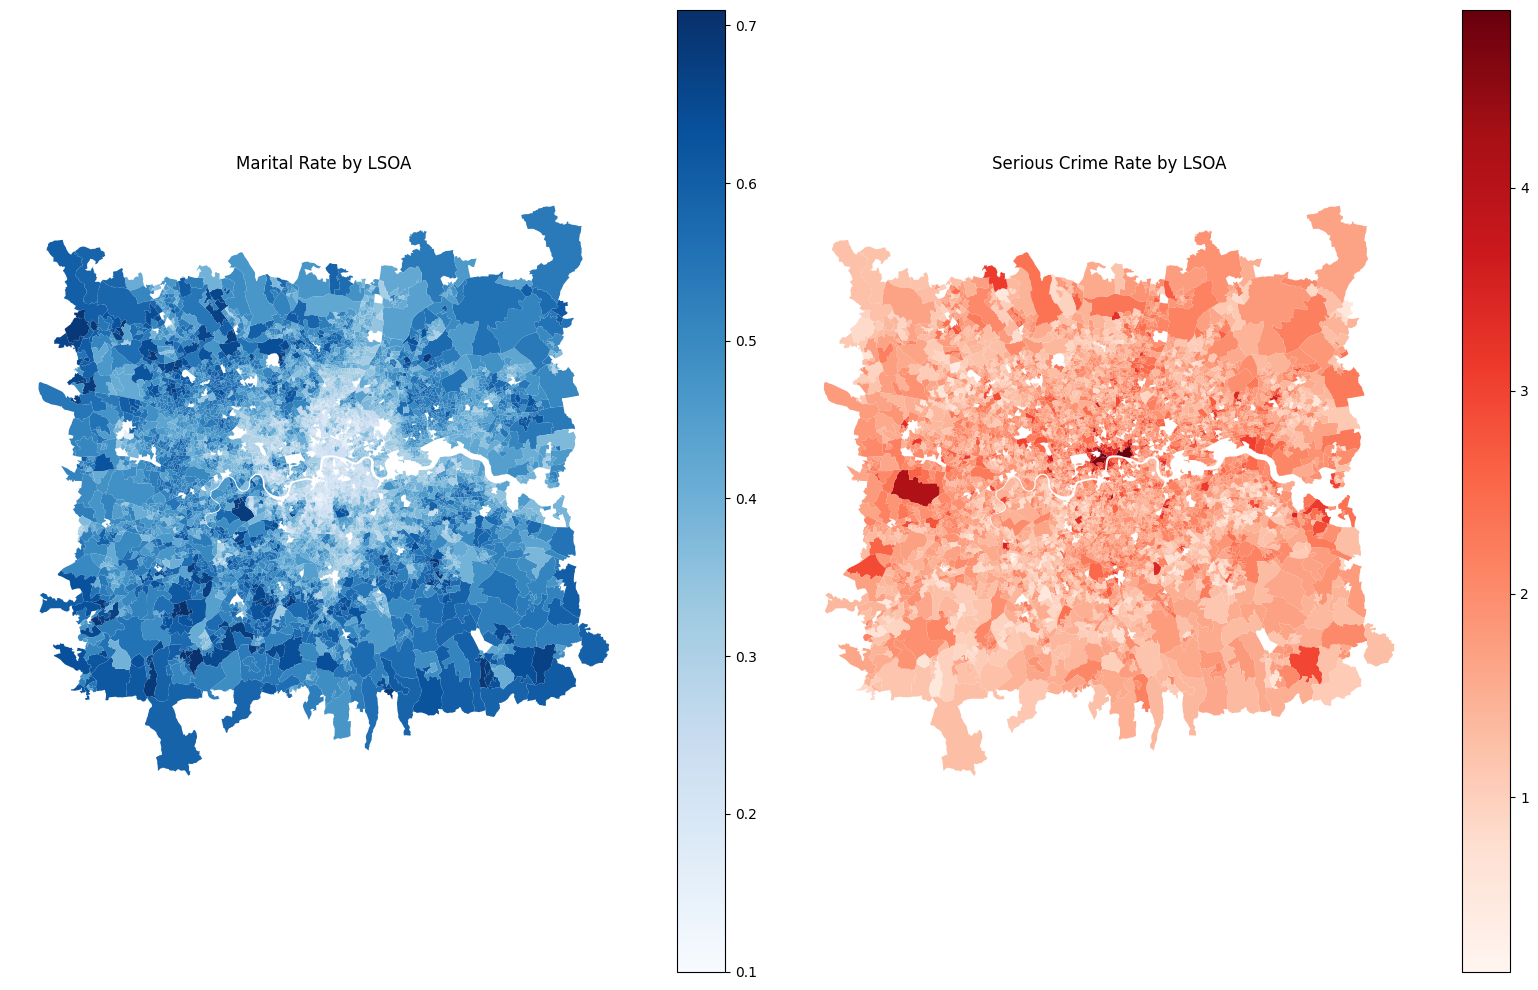

In [34]:
import matplotlib.pyplot as plt

from shapely.geometry import box

# Define bounding box: (minx, miny, maxx, maxy)
bbox = box(-0.55, 51.25, 0.3, 51.7)

# Filter GeoDataFrame (ensure same CRS)
gdf = gdf.to_crs(epsg=4326)  # if needed
london_gdf = gdf[gdf.geometry.intersects(bbox)]


fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# Marital Rate Map
london_gdf.plot(column= predictor, 
         cmap='Blues', 
         linewidth=0, 
         legend=True, 
         ax=axes[0])
axes[0].set_title('Marital Rate by LSOA')
axes[0].axis('off')

# Crime Rate Map
london_gdf.plot(column='log_serious_crime_rate', 
         cmap='Reds', 
         linewidth=0, 
         legend=True, 
         ax=axes[1])
axes[1].set_title('Serious Crime Rate by LSOA')
axes[1].axis('off')

plt.tight_layout()
plt.show()


C:\Users\THW_9\AppData\Local\Temp\ipykernel_2096\4280744256.py:46: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


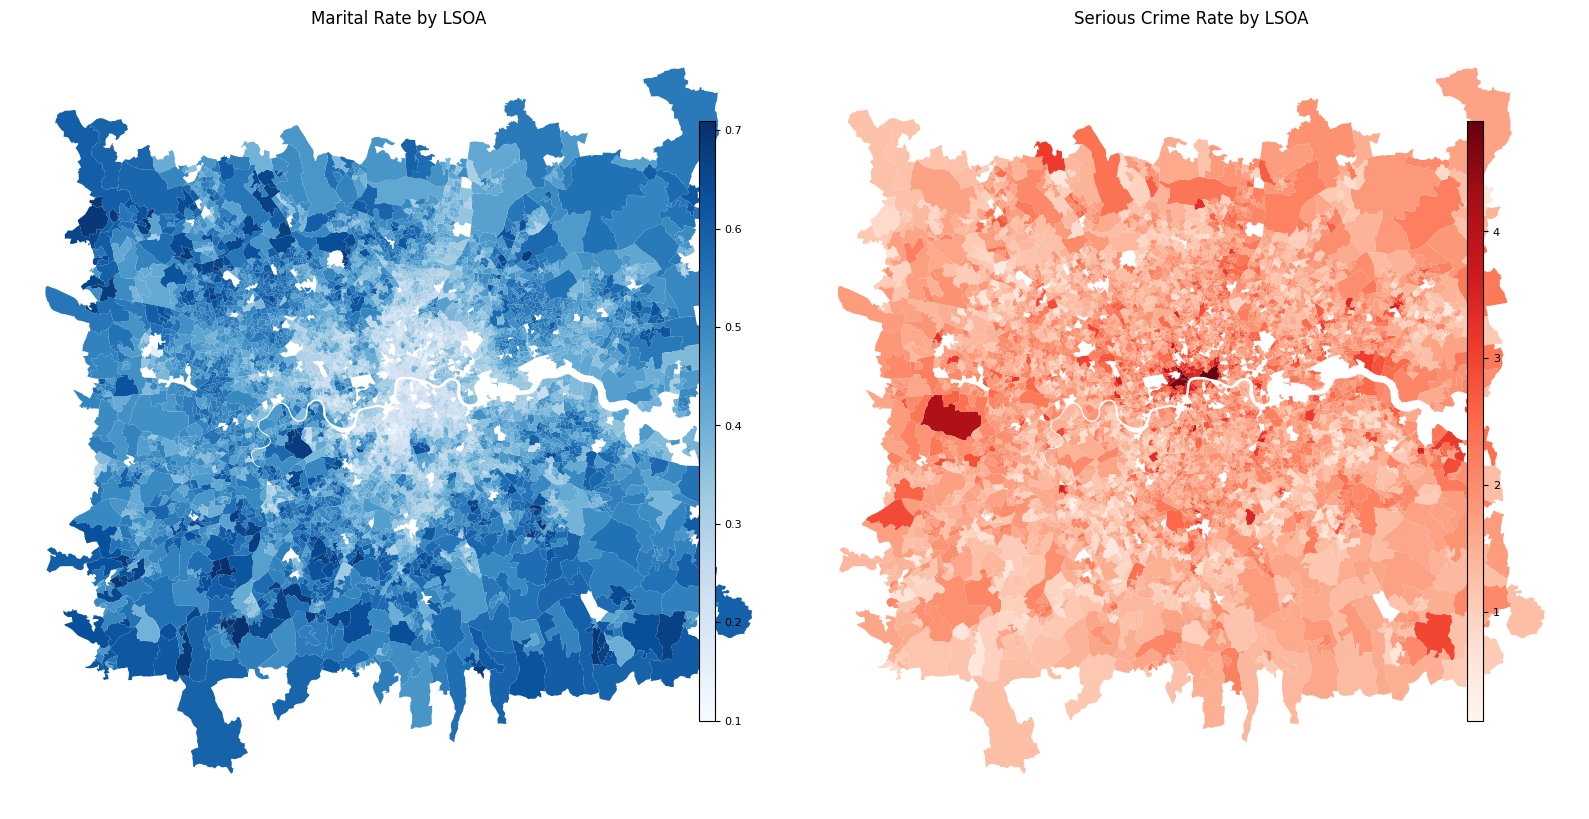

In [35]:
import matplotlib.pyplot as plt
from shapely.geometry import box
import numpy as np

# Define bounding box: (minx, miny, maxx, maxy)
bbox = box(-0.55, 51.25, 0.3, 51.7)

# Ensure CRS and filter for London
gdf = gdf.to_crs(epsg=4326)
london_gdf = gdf[gdf.geometry.intersects(bbox)]

# Set up figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# Define custom colorbar axes: [left, bottom, width, height]
cax1 = fig.add_axes([0.44, 0.2, 0.01, 0.6])  # for subplot 1
cax2 = fig.add_axes([0.92, 0.2, 0.01, 0.6])  # for subplot 2

# Plot 1: Marital Rate
london_gdf.plot(
    column=predictor,
    cmap='Blues',
    linewidth=0,
    legend=True,
    ax=axes[0],
    cax=cax1
)
axes[0].set_title('Marital Rate by LSOA')
axes[0].axis('off')
cax1.tick_params(labelsize=8)

# Plot 2: Serious Crime Rate
london_gdf.plot(
    column='log_serious_crime_rate',
    cmap='Reds',
    linewidth=0,
    legend=True,
    ax=axes[1],
    cax=cax2
)
axes[1].set_title('Serious Crime Rate by LSOA')
axes[1].axis('off')
cax2.tick_params(labelsize=8)

# Layout
plt.tight_layout()
plt.show()


c:\Users\THW_9\anaconda3\envs\tf\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


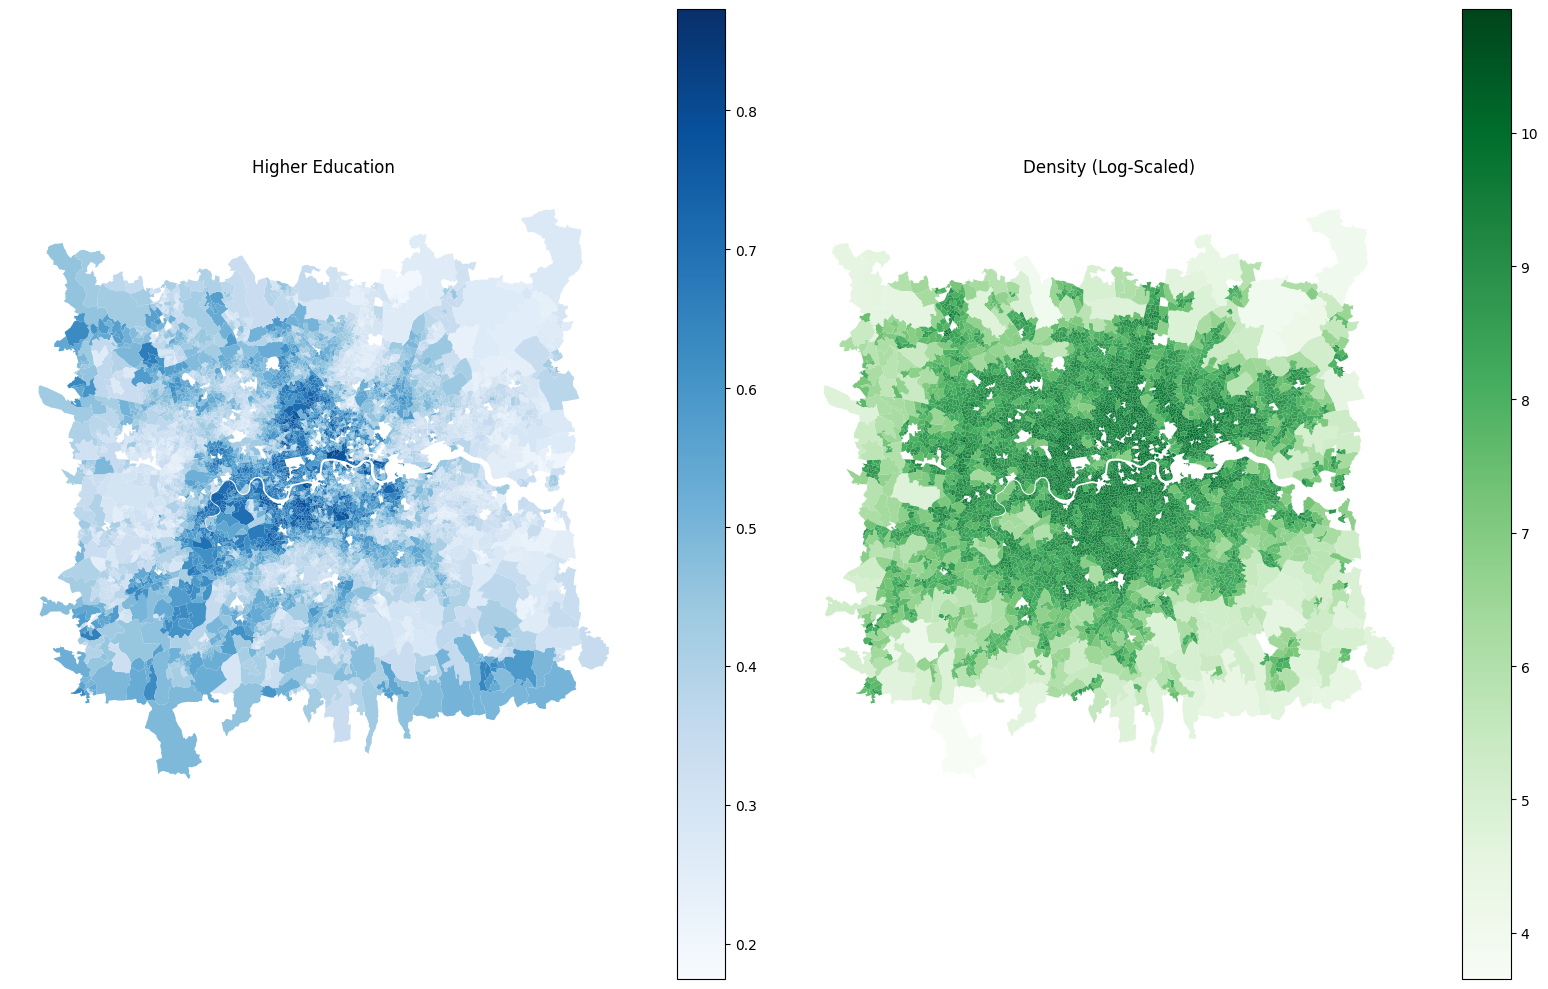

In [36]:
import matplotlib.pyplot as plt

from shapely.geometry import box

# Define bounding box: (minx, miny, maxx, maxy)
bbox = box(-0.55, 51.25, 0.3, 51.7)

# Filter GeoDataFrame (ensure same CRS)
gdf = gdf.to_crs(epsg=4326)  # if needed
london_gdf = gdf[gdf.geometry.intersects(bbox)]


fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# Marital Rate Map
london_gdf.plot(column= 'higher_education_rate', 
         cmap='Blues', 
         linewidth=0, 
         legend=True, 
         ax=axes[0])
axes[0].set_title('Higher Education')
axes[0].axis('off')

#log density
london_gdf['logdensity'] = np.log(london_gdf['density'] + 1)  # Adding 1 to avoid log(0)

# Crime Rate Map
london_gdf.plot(column='logdensity', 
         cmap='Greens', 
         linewidth=0, 
         legend=True, 
         ax=axes[1])
axes[1].set_title('Density (Log-Scaled)')
axes[1].axis('off')

plt.tight_layout()
plt.show()

c:\Users\THW_9\anaconda3\envs\tf\lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)
C:\Users\THW_9\AppData\Local\Temp\ipykernel_2096\1277770433.py:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


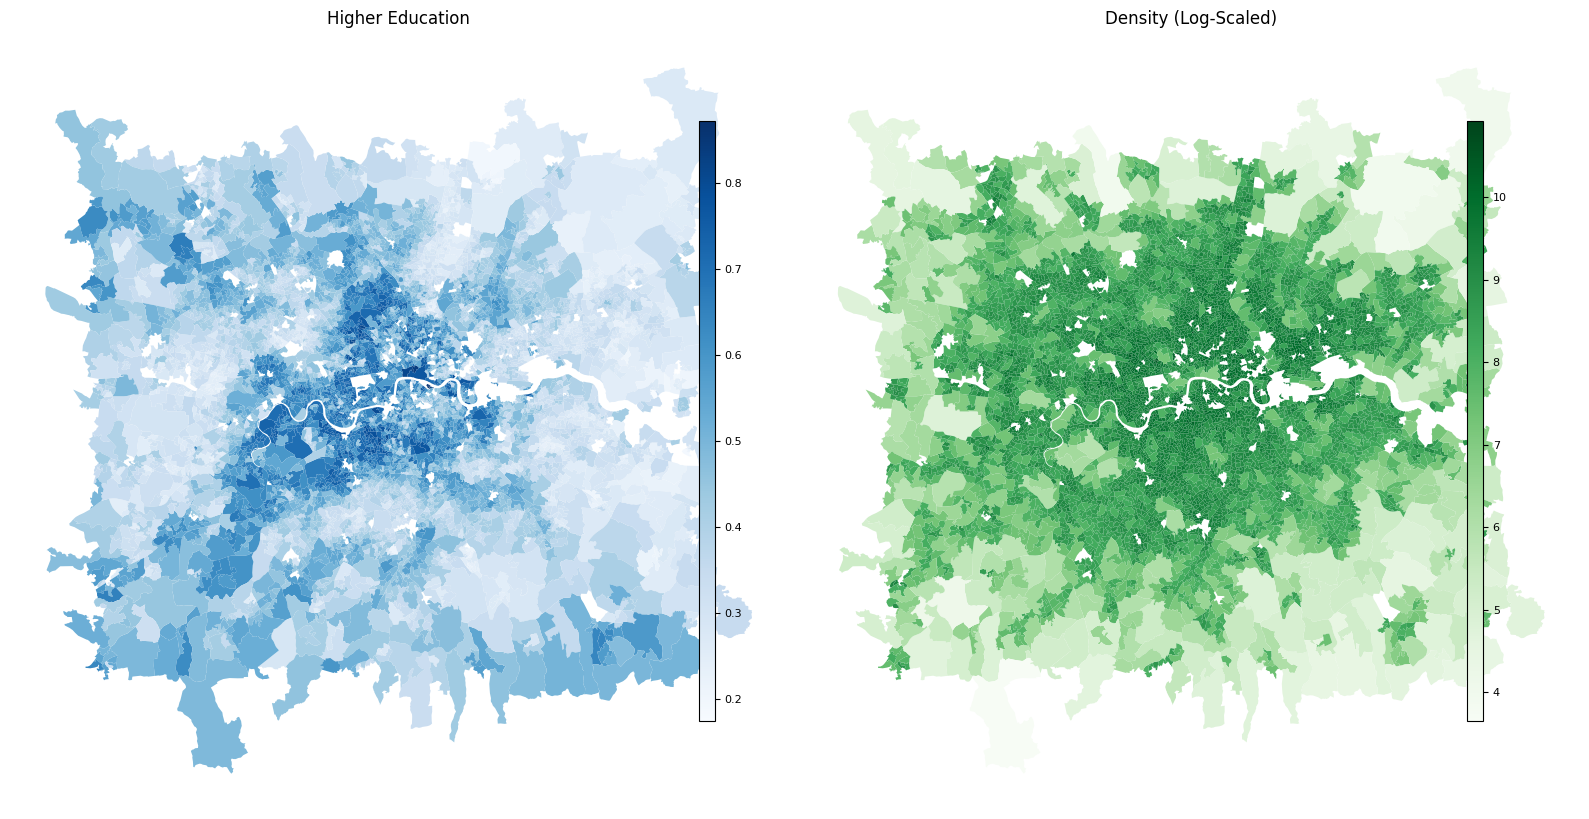

In [37]:
import matplotlib.pyplot as plt
import numpy as np
from shapely.geometry import box

# Bounding box and CRS
bbox = box(-0.55, 51.25, 0.3, 51.7)
gdf = gdf.to_crs(epsg=4326)
london_gdf = gdf[gdf.geometry.intersects(bbox)]

# Log density
london_gdf['logdensity'] = np.log(london_gdf['density'] + 1)

# Create figure and subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 10))

# Plot 1: Higher Education Rate
cax1 = fig.add_axes([0.44, 0.2, 0.01, 0.6])  # [left, bottom, width, height]
london_gdf.plot(column='higher_education_rate',
                cmap='Blues',
                linewidth=0,
                ax=axes[0],
                legend=True,
                cax=cax1)

axes[0].set_title('Higher Education')
axes[0].axis('off')
cax1.tick_params(labelsize=8)

# Plot 2: Log Density
cax2 = fig.add_axes([0.92, 0.2, 0.01, 0.6])
london_gdf.plot(column='logdensity',
                cmap='Greens',
                linewidth=0,
                ax=axes[1],
                legend=True,
                cax=cax2)

axes[1].set_title('Density (Log-Scaled)')
axes[1].axis('off')
cax2.tick_params(labelsize=8)

plt.tight_layout()
plt.show()


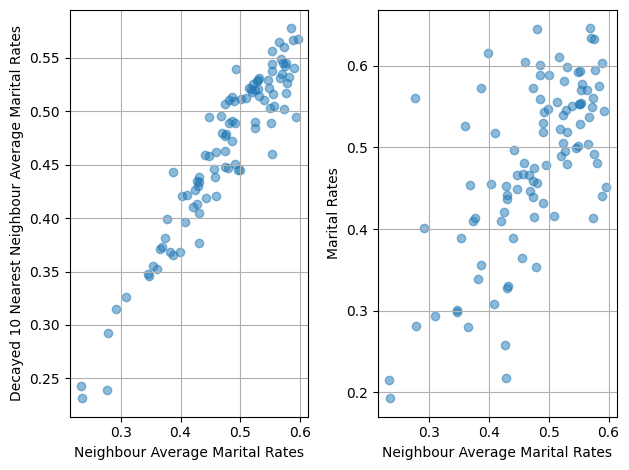

In [38]:
# scatter neighbourhood aerage and decayed average
import matplotlib.pyplot as plt

sample_gdf = gdf.sample(n=100, random_state=42)

# First subplot: Serious Crime Rate
plt.subplot(1, 2, 1)

plt.scatter(sample_gdf['neighbor_avg_' + predictor], sample_gdf['decayed_10nn_avg_' + predictor], alpha=0.5)
plt.xlabel('Neighbour Average Marital Rates')
plt.ylabel('Decayed 10 Nearest Neighbour Average Marital Rates')
#plt.title('Effect of Spatial Decay')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(sample_gdf['neighbor_avg_' + predictor], sample_gdf[predictor], alpha=0.5)
plt.xlabel('Neighbour Average Marital Rates')
plt.ylabel('Marital Rates')
#plt.title('Difference between Neighbour Average and Marital Rates'
plt.grid(True)

plt.tight_layout()
#plt.suptitle('Comparison of Neighbourhood Average and Decayed Average Marital Rates', fontsize=16)
plt.show()



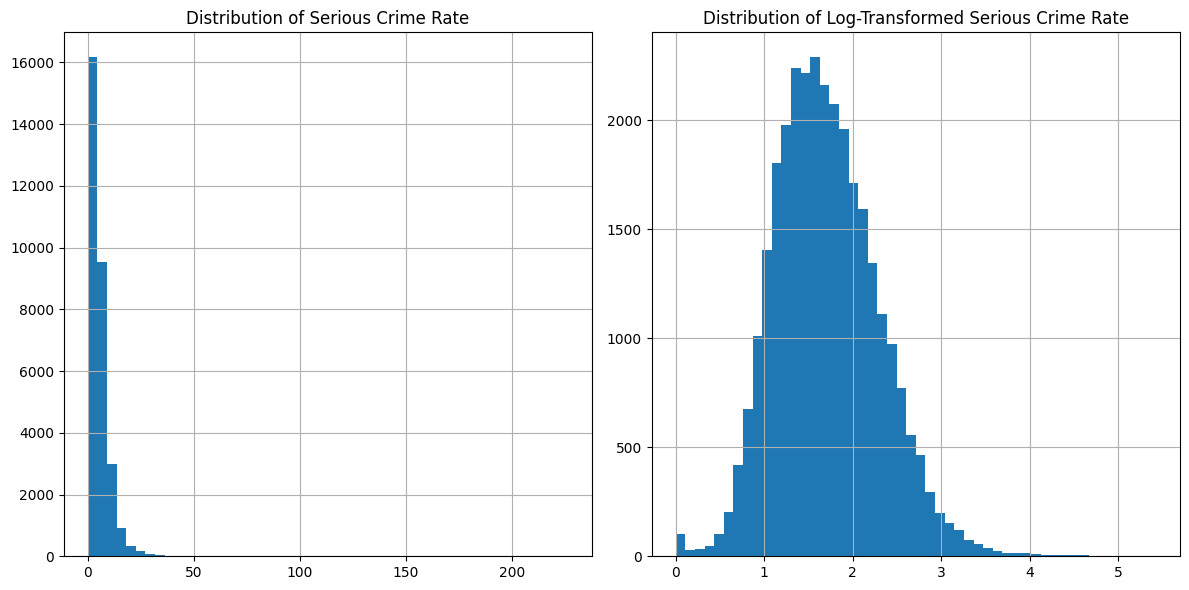

In [39]:
import matplotlib.pyplot as plt

# Plot the distribution of serious crime rate and log serious crime rate 
# Put them next to each other for comparison
plt.figure(figsize=(12, 6))

# First subplot: Serious Crime Rate
plt.subplot(1, 2, 1)
gdf['serious_crime_rate'].hist(bins=50)
plt.title('Distribution of Serious Crime Rate')

# Second subplot: Log Serious Crime Rate
plt.subplot(1, 2, 2)
gdf['log_serious_crime_rate'].hist(bins=50)
plt.title('Distribution of Log-Transformed Serious Crime Rate')

plt.tight_layout()
plt.show()



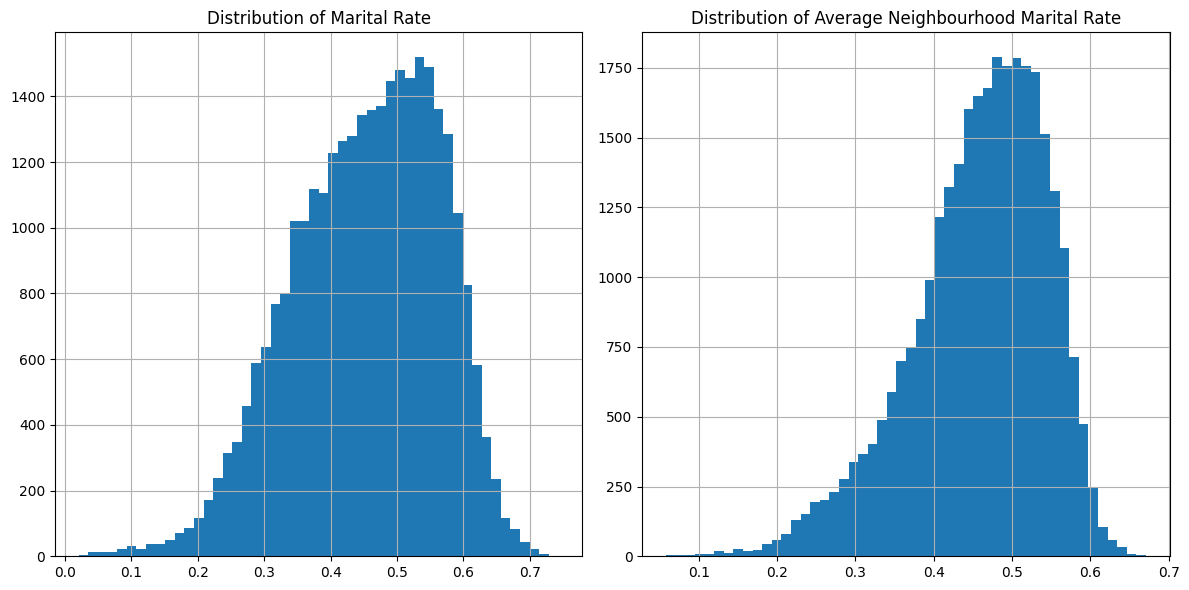

In [57]:
import matplotlib.pyplot as plt

# Plot the distribution of serious crime rate and log serious crime rate 
# Put them next to each other for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

gdf['marriedrate'].hist(bins=50)
plt.title('Distribution of Marital Rate')

plt.subplot(1, 2, 2)
gdf['neighbor_avg_' + predictor].hist(bins=50)
plt.title('Distribution of Average Neighbourhood Marital Rate')

plt.tight_layout()
plt.show()


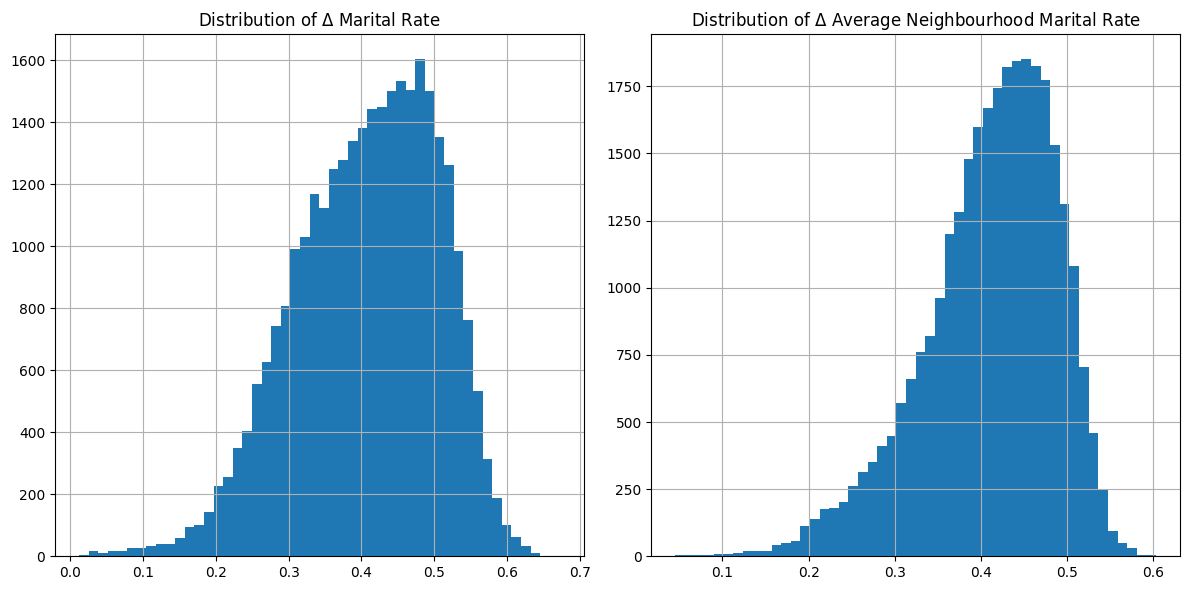

In [59]:
import matplotlib.pyplot as plt

# Plot the distribution of serious crime rate and log serious crime rate 
# Put them next to each other for comparison
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)

gdf['delta_' + predictor].hist(bins=50)
plt.title('Distribution of $\Delta$ Marital Rate')

plt.subplot(1, 2, 2)
gdf['delta_neighbor_avg_' + predictor].hist(bins=50)
plt.title('Distribution of $\Delta$ Average Neighbourhood Marital Rate')

plt.tight_layout()
plt.show()


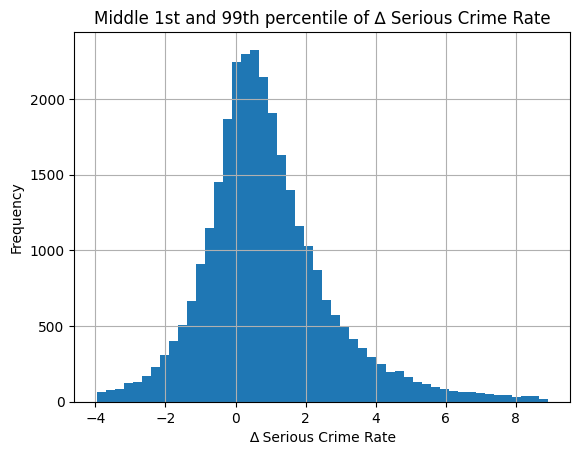

In [58]:


# Compute 1st and 99th percentiles
lower = gdf['delta_serious_crime_rate'].quantile(0.01)
upper = gdf['delta_serious_crime_rate'].quantile(0.99)

# Filter the middle 98% of data
filtered = gdf[(gdf['delta_serious_crime_rate'] >= lower) & 
               (gdf['delta_serious_crime_rate'] <= upper)]

# Plot histogram
filtered['delta_serious_crime_rate'].hist(bins=50)
plt.title('Middle 1st and 99th percentile of ∆ Serious Crime Rate')
plt.xlabel('∆ Serious Crime Rate')
plt.ylabel('Frequency')
plt.show()